<a href="https://colab.research.google.com/github/Khawaritzmi/Mk.-Data-Mining-2021/blob/main/Data_Mining_Pertemuan_5_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Citra

In [21]:
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image

1. import gambar dan menampilkannya

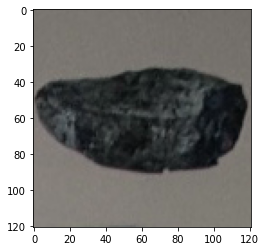

In [6]:
image = cv2.imread('/content/drive/MyDrive/Penelitian Data Coklat/Cocoa Beans-20201115T221751Z-001/Cocoa Beans/Moldy_Cocoa/MD01_05.jpg')
plt.imshow(image)

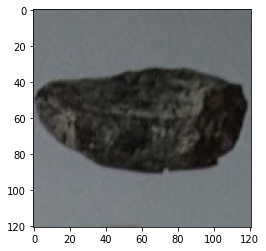

In [8]:
image_cvtresult = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_cvtresult)

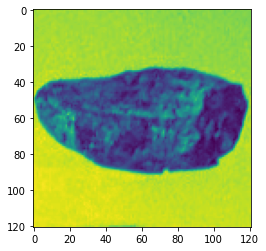

In [11]:
r,g,b = cv2.split(image_cvtresult)
plt.imshow(b)

In [13]:
image_array = img_to_array(image_cvtresult)
print(image_array)

[[[112. 117. 121.]
  [109. 114. 118.]
  [115. 120. 124.]
  ...
  [104. 109. 113.]
  [106. 111. 115.]
  [106. 111. 115.]]

 [[113. 118. 122.]
  [110. 115. 119.]
  [114. 119. 123.]
  ...
  [106. 111. 115.]
  [105. 110. 114.]
  [104. 109. 113.]]

 [[114. 119. 123.]
  [110. 115. 119.]
  [111. 116. 120.]
  ...
  [106. 111. 115.]
  [105. 110. 114.]
  [104. 109. 113.]]

 ...

 [[127. 132. 136.]
  [125. 130. 134.]
  [124. 129. 133.]
  ...
  [117. 125. 128.]
  [118. 126. 129.]
  [116. 124. 127.]]

 [[128. 133. 137.]
  [125. 130. 134.]
  [124. 129. 133.]
  ...
  [116. 124. 127.]
  [118. 126. 129.]
  [117. 125. 128.]]

 [[129. 134. 138.]
  [126. 131. 135.]
  [124. 129. 133.]
  ...
  [117. 125. 128.]
  [119. 127. 130.]
  [118. 126. 129.]]]


<function matplotlib.pyplot.show>

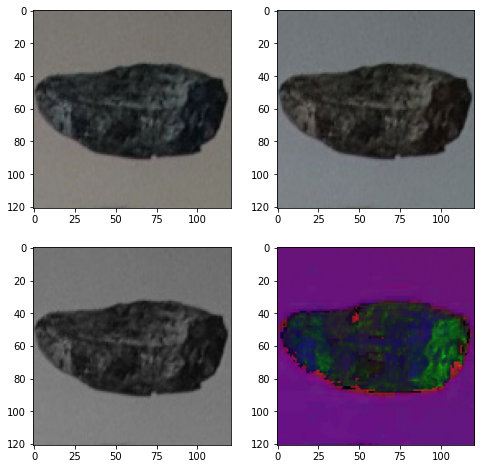

In [14]:
fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.imshow(image)

ax = fig.add_subplot(2, 2, 2)
plt.imshow(image_cvtresult)

ax = fig.add_subplot(2, 2, 3)
plt.imshow(image_grayscale)

ax = fig.add_subplot(2, 2, 4)
plt.imshow(image_hsv)

plt.show

<function matplotlib.pyplot.show>

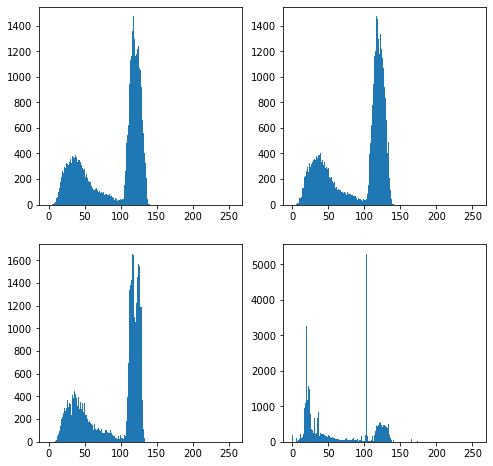

In [16]:
fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.hist(image.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 2)
plt.hist(image_cvtresult.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 3)
plt.hist(image_grayscale.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 4)
plt.hist(image_hsv.ravel(),256,[0,256])

plt.show

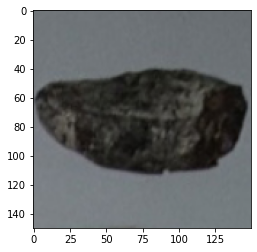

In [20]:
image_resize = cv2.resize(image_cvtresult, (150, 150))
plt.imshow(image_resize)

In [23]:
base_directory = '/content/'
augmented_directory = os.path.join(base_directory, "augmented_result")
os.mkdir(augmented_directory)

In [31]:
datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.5
)

In [33]:
path = "/content/drive/MyDrive/Penelitian Data Coklat/Cocoa Beans-20201115T221751Z-001/Cocoa Beans/Moldy_Cocoa"
size = 150
dataset = []
image_dir = os.listdir(path)

img = io.imread(f"{path}/{image_dir[0]}")
img = Image.fromarray(img, 'RGB')
img = img.resize((size, size))
dataset.append(np.array(img))
x = np.array(dataset)

In [34]:
i = 0
for j in datagen.flow(x, batch_size = 32,
                      save_to_dir = "/content/augmented_result/",
                      save_prefix = "aug_rslt",
                      save_format = "png"):

  i += 1
  if i > 30:
    break

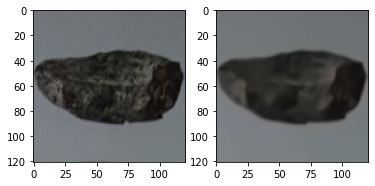

In [36]:
image1 = cv2.GaussianBlur(image_cvtresult, (3,3), 0)
rgb_dst = cv2.fastNlMeansDenoisingColored(image1, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(image_cvtresult)
plt.subplot(122),plt.imshow(rgb_dst)

plt.show()